The dataset is composed of 25 different variables, seen below which hold historical data ranging from 1993/94 - 2024/25 (Mid Season).

Credits to Joseph Buchdahl,
twitter: https://x.com/12Xpert, Web, http://12xpert.co.uk/

1) Date, The date when the match was played

2) Season, The football season in which the match took place (usually spans across two years, e.g., 2023-24)

3) HomeTeam, The team playing at their home stadium

4) AwayTeam, The visiting team

5) FTH Goals, Full Time Home Goals (total goals scored by home team at the end of the match)

6) FTA Goals, Full Time Away Goals (total goals scored by away team at the end of the match)

7) FT Result, Full Time Result (typically shown as H for home win, A for away win, D for draw)

8) HTH Goals, Half Time Home Goals (goals scored by home team at half-time)

9) HTA Goals, Half Time Away Goals (goals scored by away team at half-time)

10) HT Result, Half Time Result (H for home team leading, A for away team leading, D for draw at half-time)

11) Referee, Name of the match official/referee

12) H Shots, Total shots attempted by the home team

13) A Shots, Total shots attempted by the away team

14) H SOT, Home Shots on Target (shots by home team that were on goal)

15) A SOT, Away Shots on Target (shots by away team that were on goal)

16) H Fouls, Number of fouls committed by the home team

17) A Fouls, Number of fouls committed by the away team

18) H Corners, Corner kicks awarded to the home team

19) A Corners, Corner kicks awarded to the away team

20) H Yellow, Yellow cards shown to home team players

21) A Yellow, Yellow cards shown to away team players

22) H Red, Red cards shown to home team players

23) A Red, Red cards shown to away team players

24) Display_Order, A numerical ordering system for displaying the matches (likely used for sorting or presentation purposes)

25) League, The competition or league in which the match was played

link to dataset: https://www.kaggle.com/datasets/panaaaaa/english-premier-league-and-championship-full-dataset 

In [390]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import root_mean_squared_error, accuracy_score, classification_report, r2_score, roc_auc_score
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [332]:
data = pd.read_csv("England CSV.csv")

In [333]:
data.head()

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,...,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,...,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,...,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,...,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,...,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League


In [334]:
print(f"No. of rows: {data.shape[0]}\nNo. of columns: {data.shape[1]}")

No. of rows: 12153
No. of columns: 25


In [335]:
data["Date"] = pd.to_datetime(data["Date"])

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12153 entries, 0 to 12152
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           12153 non-null  datetime64[ns]
 1   Season         12153 non-null  object        
 2   HomeTeam       12153 non-null  object        
 3   AwayTeam       12153 non-null  object        
 4   FTH Goals      12153 non-null  int64         
 5   FTA Goals      12153 non-null  int64         
 6   FT Result      12153 non-null  object        
 7   HTH Goals      11229 non-null  float64       
 8   HTA Goals      11229 non-null  float64       
 9   HT Result      11229 non-null  object        
 10  Referee        9329 non-null   object        
 11  H Shots        9329 non-null   float64       
 12  A Shots        9329 non-null   float64       
 13  H SOT          9329 non-null   float64       
 14  A SOT          9329 non-null   float64       
 15  H Fouls        9329

In [337]:
data.isnull().sum()

Date                0
Season              0
HomeTeam            0
AwayTeam            0
FTH Goals           0
FTA Goals           0
FT Result           0
HTH Goals         924
HTA Goals         924
HT Result         924
Referee          2824
H Shots          2824
A Shots          2824
H SOT            2824
A SOT            2824
H Fouls          2824
A Fouls          2824
H Corners        2824
A Corners        2824
H Yellow         2824
A Yellow         2824
H Red            2824
A Red            2824
Display_Order       0
League              0
dtype: int64

the null values are likely caused by the fact that some statistics were not recorded before the 2000/01 season, so i'll use data starting from the 2000/01 season.

In [338]:
data = data[(data['Date'] >= '2000-08-19') & (data['Date'] <= '2025-01-16')]

In [339]:
print(f"Sample size: {len(data)} matches")
print(f"Date range {data['Date'].min().strftime('%d-%m-%Y')} to {data['Date'].max().strftime('%d-%m-%Y')}")
print(f"Seasons: {data['Season'].nunique()} unique seasons")

Sample size: 9329 matches
Date range 19-08-2000 to 16-01-2025
Seasons: 25 unique seasons


In [340]:
data.isnull().sum()

Date             0
Season           0
HomeTeam         0
AwayTeam         0
FTH Goals        0
FTA Goals        0
FT Result        0
HTH Goals        0
HTA Goals        0
HT Result        0
Referee          0
H Shots          0
A Shots          0
H SOT            0
A SOT            0
H Fouls          0
A Fouls          0
H Corners        0
A Corners        0
H Yellow         0
A Yellow         0
H Red            0
A Red            0
Display_Order    0
League           0
dtype: int64

In [341]:
# creating some calculated columns
data['TotalGoals'] = data['FTH Goals'] + data['FTA Goals']
data['GoalDifference'] = data['FTH Goals'] - data['FTA Goals']
data['HTGoalDifference'] = data['HTH Goals'] - data['HTA Goals']
data['H ShotAccuracy'] = data['H SOT'] / data['H Shots']
data['A ShotAccuracy'] = data['A SOT'] / data['A Shots']
data['H ShotConversion'] = data['FTH Goals'] / data['H SOT']
data['A ShotConversion'] = data['FTA Goals'] / data['A SOT']

# replacing infinite and NAN values with 0
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

### Is there a home advantage in the Premier League? 

using a paired t-test to test whether there is a home team advantage in the Premier League. 

- H0: Home teams and away teams score the same number of goals on average
- H1: Home teams score more goals than away teams on average

In [342]:
t_stat, p_value = stats.ttest_rel(data['FTH Goals'], data['FTA Goals'], alternative='greater')
print(f"Paired t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"The p-value is less than {alpha}, so we reject the null hypothesis.")
    print("There is evidence that home teams score more goals than away teams on average.")
else:
    print(f"The p-value is greater tahn {alpha}, so we fail to reject the null hypothesis.")
    print("There is insufficient evidence that home teams score more goals than away teams.")

Paired t-test results:
t-statistic: 18.9933
p-value: 0.0000
The p-value is less than 0.05, so we reject the null hypothesis.
There is evidence that home teams score more goals than away teams on average.


In [343]:
home_goals = data['FTH Goals']
away_goals = data['FTA Goals']
mean_home = home_goals.mean()
mean_away = away_goals.mean()

mean_diff = mean_home - mean_away
pooled_std = np.sqrt((home_goals.std()**2 + away_goals.std()**2) / 2)
cohens_d = mean_diff / pooled_std

print(f"Mean goals scored by home teams: {mean_home:.2f}")
print(f"Mean goals scored by away teams: {mean_away:.2f}")
print(f"Mean difference: {mean_diff:.2f}")
print(f"Effect size (Cohen's d): {cohens_d:.2f}")

Mean goals scored by home teams: 1.54
Mean goals scored by away teams: 1.18
Mean difference: 0.36
Effect size (Cohen's d): 0.29


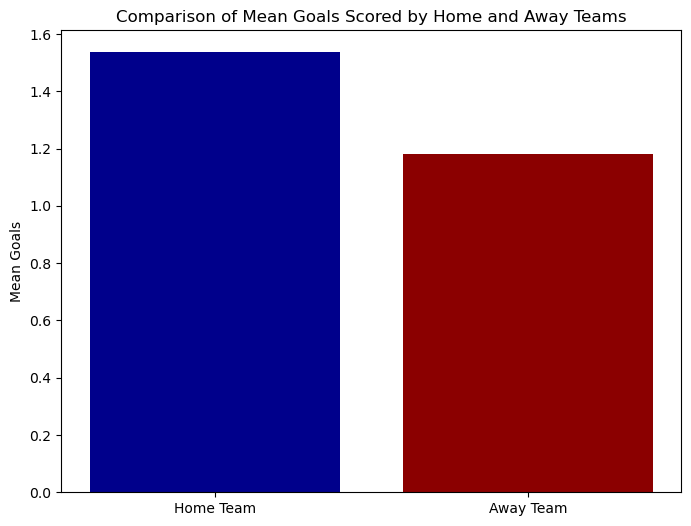

In [344]:
plt.figure(figsize=(8, 6))
plt.bar(['Home Team', 'Away Team'], [mean_home, mean_away], capsize=10, color=['darkblue', 'darkred'])
plt.title('Comparison of Mean Goals Scored by Home and Away Teams')
plt.ylabel('Mean Goals')
plt.show()

### How often did the home team win the game when leading at half time?

In [345]:
HTH = data[data['HT Result'] == 'H']

In [346]:
total_matches = len(HTH)
home_wins = len(HTH[HTH['FT Result'] == 'H'])
win_pct = (home_wins / total_matches) * 100

In [347]:
print(f"Total matches where home team led at half time: {total_matches}")
print(f"Home team went on to win: {home_wins}")
print(f"Win percentage: {win_pct:.2f}%")

Total matches where home team led at half time: 3268
Home team went on to win: 2624
Win percentage: 80.29%


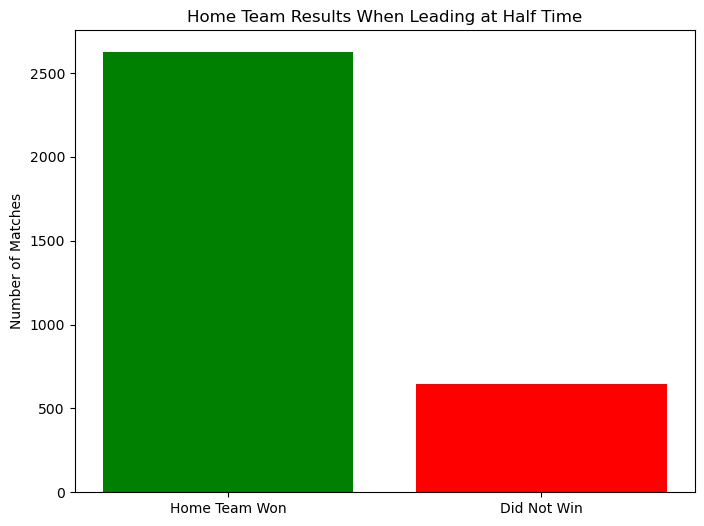

In [348]:
plt.figure(figsize=(8,6))
plt.bar(['Home Team Won', 'Did Not Win'], [home_wins, total_matches-home_wins], color=['green', 'red'])
plt.title('Home Team Results When Leading at Half Time')
plt.ylabel('Number of Matches')
plt.show()

when a home team leads at halftime, they go on to win the match ~80% of the time.

### What percentage of matches result in home wins, away wins, and draws?

In [349]:
total_matches = len(data)
result_counts = data['FT Result'].value_counts()
result_pcts = (result_counts / total_matches) * 100

print("Match Result Distribution:")
print(result_pcts)

Match Result Distribution:
FT Result
H    45.857005
A    29.349341
D    24.793654
Name: count, dtype: float64


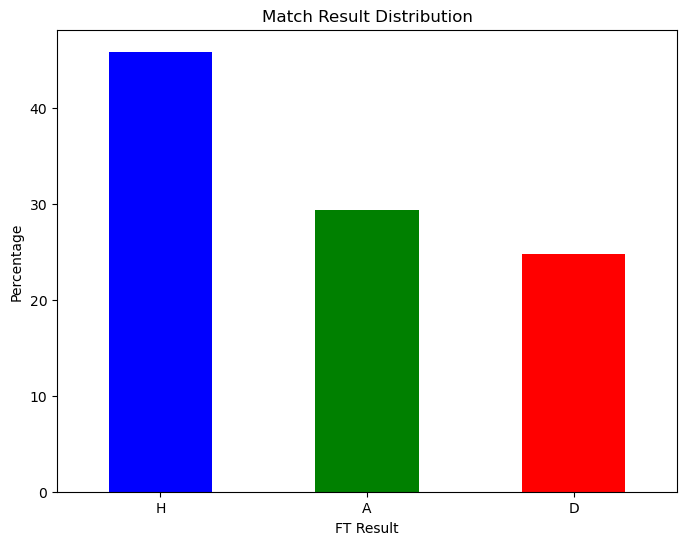

In [350]:
plt.figure(figsize=(8,6))
result_pcts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Match Result Distribution')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

this shows that since the 2000/01 season, the home team has went on to win the game ~46% of the time.

### Do home teams have more shots on target than away teams?

- H0: Home teams and away teams have the same number of shots on target on average
- H1: Home teams have more shots on target than away teams on average

In [351]:
t_stat, p_value = stats.ttest_rel(data['H SOT'], data['A SOT'], alternative='greater')
print(f"Paired t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print(f"The p-value is less than {alpha}, so we reject the null hypothesis.")
    print("There is evidence that home teams have more shots on target than away teams.")
else:
    print(f"The p-value is greater than {alpha}, so we fail to reject the null hypothesis.")
    print("There is insufficient evidence that home teams have more shots on target.")

mean_diff = data['H SOT'].mean() - data['A SOT'].mean()
pooled_std = np.sqrt((data['H SOT'].std()**2 + data['A SOT'].std()**2) / 2)
cohens_d = mean_diff / pooled_std

print(f"\nMean shots on target by home teams: {data['H SOT'].mean():.2f}")
print(f"Mean shots on target by away teams: {data['A SOT'].mean():.2f}")
print(f"Mean difference: {mean_diff:.2f}\n")
print(f"Effect size (Cohen's d): {cohens_d:.2f}")

Paired t-test results:
t-statistic: 28.7544
p-value: 0.0000
The p-value is less than 0.05, so we reject the null hypothesis.
There is evidence that home teams have more shots on target than away teams.

Mean shots on target by home teams: 6.01
Mean shots on target by away teams: 4.70
Mean difference: 1.30

Effect size (Cohen's d): 0.43


### How does the number of shots on target correlate with match outcome?

In [352]:
avg_shotsont = data.groupby('FT Result')[['H SOT', 'A SOT']].mean()

print("Average Shots on Target by Match Result:")
print(avg_shotsont)

Average Shots on Target by Match Result:
              H SOT     A SOT
FT Result                    
A          4.670928  6.041636
D          5.560311  4.576308
H          7.104722  3.918420


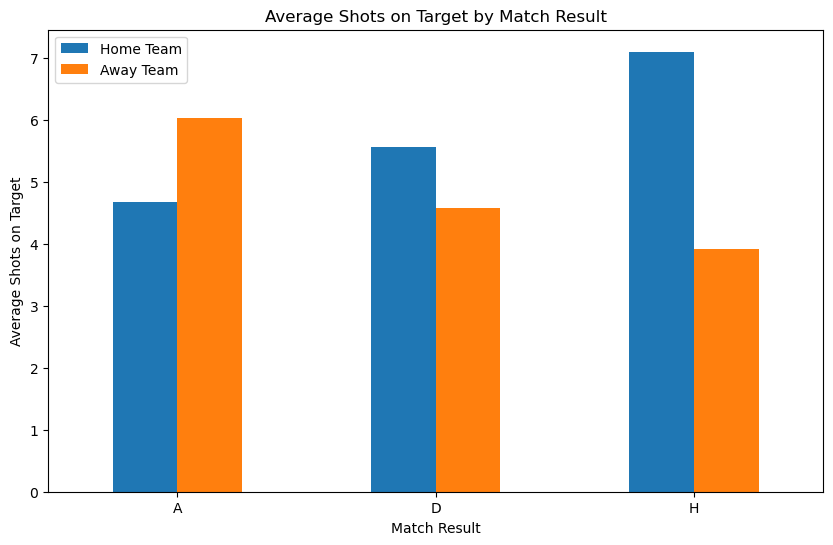

In [353]:
avg_shotsont.plot(kind='bar', figsize=(10,6))
plt.title('Average Shots on Target by Match Result')
plt.xlabel('Match Result')
plt.ylabel('Average Shots on Target')
plt.xticks(rotation=0)
plt.legend(['Home Team', 'Away Team'])
plt.show()

- home wins: home team averages 7.1 SOT, away team averages 3.9 SOT

- away wins: home team averages 5.6 SOT, away team averages 4.6 SOT

- draws: home team averages 4.6 SOT, away team averages 4.5 SOT

In [354]:
data['SOT Diff'] = data['H SOT'] - data['A SOT']

sot_by_result = data.groupby('FT Result')['SOT Diff'].mean()
print(f"Average shots on target difference (Home - Away) by result: {sot_by_result}")

Average shots on target difference (Home - Away) by result: FT Result
A   -1.370709
D    0.984003
H    3.186302
Name: SOT Diff, dtype: float64


### Do referees show bias in issuing yellow cards?

- H0: The ratio of yellow cards to fouls is the same for home and away teams
- H1: Away teams receive more yellow cards per foul than home teams

In [355]:
data['HomeYellowsPerFoul'] = data['H Yellow'] / data['H Fouls']
data['AwayYellowsPerFoul'] = data['A Yellow'] / data['A Fouls']
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

In [356]:
t_stat, p_value = stats.ttest_rel(data['HomeYellowsPerFoul'], data['AwayYellowsPerFoul'], alternative='less')
print(f"Paired t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print(f"The p-value is less than {alpha}, so we reject the null hypothesis.")
    print("There is evidence of referee bias with away teams receiving more yellow cards per foul.")
else:
    print(f"The p-value is greater than {alpha}, so we fail to reject the null hypothesis.")
    print("There is insufficient evidence of referee bias in issuing yellow cards.")

mean_diff = data['HomeYellowsPerFoul'].mean() - data['AwayYellowsPerFoul'].mean()
pooled_std = np.sqrt((data['HomeYellowsPerFoul'].std()**2 + data['AwayYellowsPerFoul'].std()**2) / 2)
cohens_d = mean_diff / pooled_std

print(f"\nMean yellow cards per foul for home teams: {data['HomeYellowsPerFoul'].mean():.4f}")
print(f"Mean yellow cards per foul for away teams: {data['AwayYellowsPerFoul'].mean():.4f}")
print(f"Mean difference: {mean_diff:.4f}\n")
print(f"Effect size (Cohen's d): {cohens_d:.2f}")

Paired t-test results:
t-statistic: -15.7309
p-value: 0.0000
The p-value is less than 0.05, so we reject the null hypothesis.
There is evidence of referee bias with away teams receiving more yellow cards per foul.

Mean yellow cards per foul for home teams: 0.1323
Mean yellow cards per foul for away teams: 0.1573
Mean difference: -0.0249

Effect size (Cohen's d): -0.21


### Which referees give out the most yellow cards per match?

In [357]:
ref_yellows = data.groupby('Referee')[['H Yellow', 'A Yellow']].sum()
ref_yellows['Total'] = ref_yellows['H Yellow'] + ref_yellows['A Yellow']
ref_yellows['Matches'] = data['Referee'].value_counts()
ref_yellows['Yellows per Match'] = ref_yellows['Total'] / ref_yellows['Matches']

In [358]:
top_ref_yellows = ref_yellows.sort_values(['Matches', 'Yellows per Match'], ascending=False).head(10)

print("Top 10 Referess by Yellow Cards per Match:")
print(top_ref_yellows[['Yellows per Match', 'Matches']])

Top 10 Referess by Yellow Cards per Match:
               Yellows per Match  Matches
Referee                                  
M Dean                  3.680529      529
M Atkinson              3.239651      459
A Marriner              3.127551      392
A Taylor                3.520513      390
M Oliver                3.233333      390
P Dowd                  3.538206      301
H Webb                  3.310811      296
M Clattenburg           3.252560      293
L Mason                 3.073171      287
J Moss                  3.233577      274


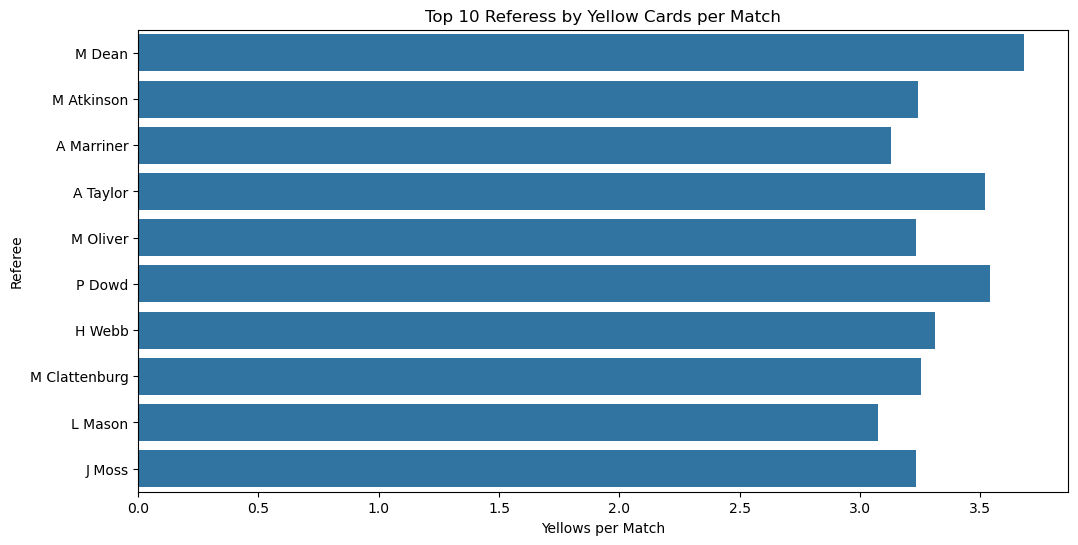

In [359]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_ref_yellows, x='Yellows per Match', y='Referee', orient='h')
plt.title('Top 10 Referess by Yellow Cards per Match')
plt.xlabel('Yellows per Match')
plt.ylabel('Referee')
plt.show()

### How does home team performance vary by season?

In [360]:
season_stats = data.groupby('Season')['FT Result'].value_counts(normalize=True).unstack() * 100

print("Match Result Percentage by Season:")
print(season_stats)

Match Result Percentage by Season:
FT Result          A          D          H
Season                                    
2000/01    25.000000  26.578947  48.421053
2001/02    30.000000  26.578947  43.421053
2002/03    27.105263  23.684211  49.210526
2003/04    27.631579  28.421053  43.947368
2004/05    25.526316  28.947368  45.526316
2005/06    29.210526  20.263158  50.526316
2006/07    26.315789  25.789474  47.894737
2007/08    27.368421  26.315789  46.315789
2008/09    28.947368  25.526316  45.526316
2009/10    23.947368  25.263158  50.789474
2010/11    23.684211  29.210526  47.105263
2011/12    30.526316  24.473684  45.000000
2012/13    27.894737  28.421053  43.684211
2013/14    32.368421  20.526316  47.105263
2014/15    30.263158  24.473684  45.263158
2015/16    30.526316  28.157895  41.315789
2016/17    28.684211  22.105263  49.210526
2017/18    28.421053  26.052632  45.526316
2018/19    33.684211  18.684211  47.631579
2019/20    30.526316  24.210526  45.263158
2020/21    40.26315

In [361]:
home_performance_by_season = data.groupby('Season').agg(
    matches=('HomeTeam', 'count'),
    home_wins=('FT Result', lambda x: sum(x == 'H')),
    home_draws=('FT Result', lambda x: sum(x == 'D')),
    home_losses=('FT Result', lambda x: sum(x == 'A')),
    home_goals_scored=('FTH Goals', 'sum'),
    home_goals_conceded=('FTA Goals', 'sum')
)

home_performance_by_season['home_win_pct'] = home_performance_by_season['home_wins'] / home_performance_by_season['matches'] * 100
home_performance_by_season['home_draw_pct'] = home_performance_by_season['home_draws'] / home_performance_by_season['matches'] * 100
home_performance_by_season['home_loss_pct'] = home_performance_by_season['home_losses'] / home_performance_by_season['matches'] * 100
home_performance_by_season['avg_goals_scored'] = home_performance_by_season['home_goals_scored'] / home_performance_by_season['matches']
home_performance_by_season['avg_goals_conceded'] = home_performance_by_season['home_goals_conceded'] / home_performance_by_season['matches']

home_performance_df = pd.DataFrame(home_performance_by_season)

In [362]:
home_performance_df

,matches,home_wins,home_draws,home_losses,home_goals_scored,home_goals_conceded,home_win_pct,home_draw_pct,home_loss_pct,avg_goals_scored,avg_goals_conceded
Season,,,,,,,,,,,
2000/01,380,184,101,95,587,405,48.421053,26.578947,25.000000,1.544737,1.065789
2001/02,380,165,101,114,557,444,43.421053,26.578947,30.000000,1.465789,1.168421
2002/03,380,187,90,103,570,430,49.210526,23.684211,27.105263,1.500000,1.131579
2003/04,380,167,108,105,572,440,43.947368,28.421053,27.631579,1.505263,1.157895
2004/05,380,173,110,97,570,405,45.526316,28.947368,25.526316,1.500000,1.065789
2005/06,380,192,77,111,555,389,50.526316,20.263158,29.210526,1.460526,1.023684
2006/07,380,182,98,100,552,379,47.894737,25.789474,26.315789,1.452632,0.997368
2007/08,380,176,100,104,581,421,46.315789,26.315789,27.368421,1.528947,1.107895
2008/09,380,173,97,110,532,410,45.526316,25.526316,28.947368,1.400000,1.078947


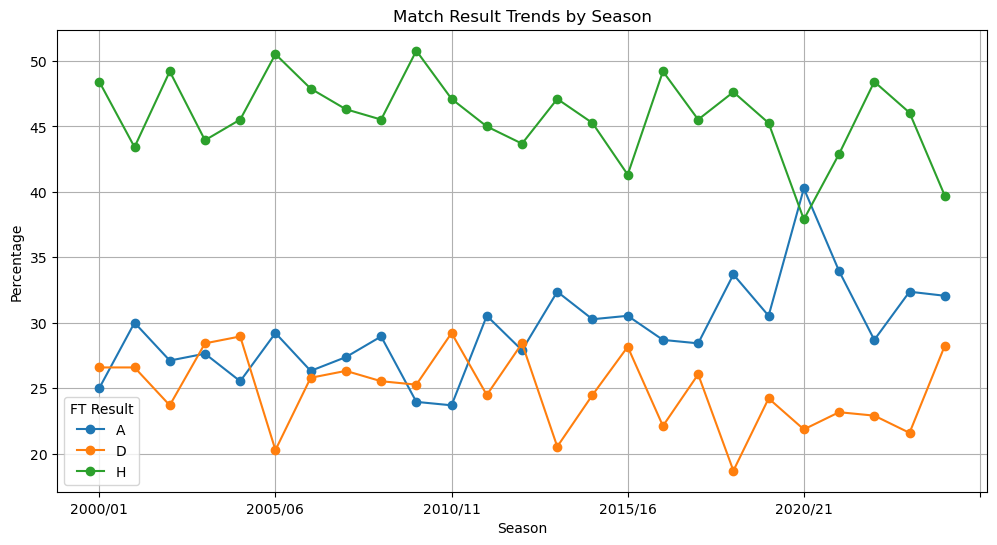

In [363]:
season_stats.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Match Result Trends by Season')
plt.ylabel('Percentage')
plt.xlabel('Season')
plt.grid(True)
plt.show()

the home win percentage has remained relatively stable between 40-50% across seasons, with away wins showing a slight increase in recent seasons (especally 2020/21, probably due to the absense of fans during COVID).

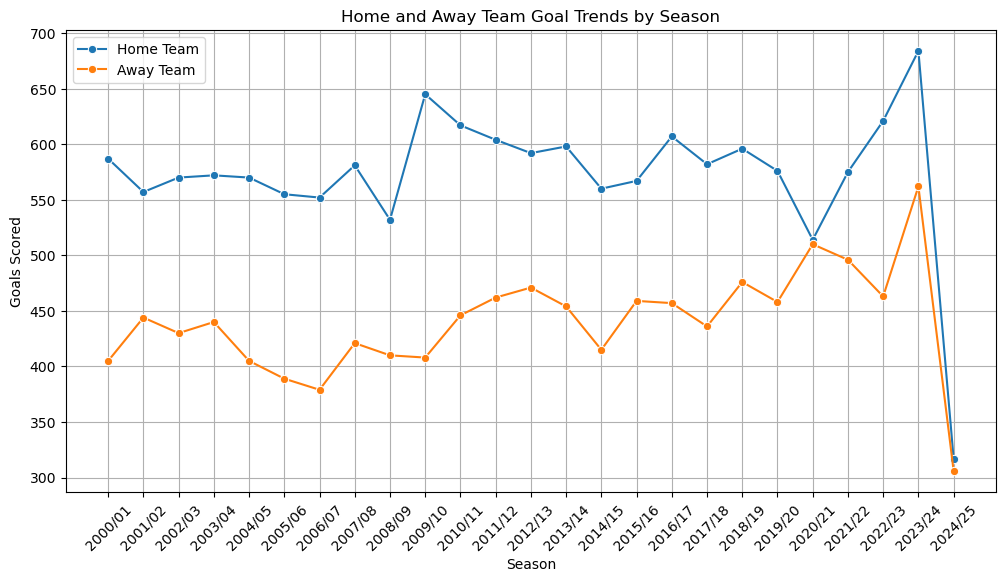

In [364]:
plt.figure(figsize=(12,6))
sns.lineplot(data=home_performance_df, x='Season', y='home_goals_scored', label='Home Team', marker='o')
sns.lineplot(data=home_performance_df, x='Season', y='home_goals_conceded', label='Away Team', marker='o')
plt.title('Home and Away Team Goal Trends by Season')
plt.ylabel('Goals Scored')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

### Does match outcome (H/D/A) affect the total number of goals scored?

using one-way ANOVA to determine whether the mean total goals scored varies among all match outcomes. then used Tukey's Honest Significant Difference (HSD) as a follow up to assess the significance of differences between the group means, if any variance is found 

- H0: The mean total goals is the same across all match outcomes
- H1: The mean total goals differs for at least one match outcome

before carrying out the ANOVA test, testing the equality of variances across groups using Levene's Test. using it because it does not assume that the data is normally distributed

In [365]:
# renaming the full time result column becase the ols function doesn't like spaces :)
data = data.rename(columns={'FT Result': 'FT_Result'})

In [366]:
home_win = data[data['FT_Result'] == 'H']['TotalGoals']
away_win = data[data['FT_Result'] == 'A']['TotalGoals']
draw = data[data['FT_Result'] == 'D']['TotalGoals']

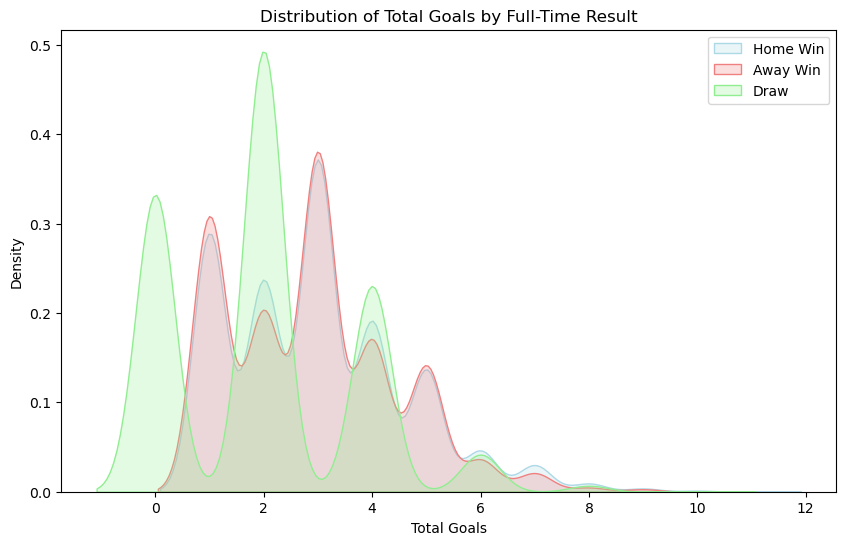

In [367]:
plt.figure(figsize=(10, 6))
sns.kdeplot(home_win, label='Home Win', shade=True, color='lightblue')
sns.kdeplot(away_win, label='Away Win', shade=True, color='lightcoral')
sns.kdeplot(draw, label='Draw', shade=True, color='lightgreen')

plt.title('Distribution of Total Goals by Full-Time Result')
plt.xlabel('Total Goals')
plt.ylabel('Density')
plt.legend()
plt.show()

the data is definintely not normally distributed :)

In [368]:
stat, p_value = stats.levene(home_win, away_win, draw)
print(f"Levene's Test statistic: {stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print("The variances are significantly different, so reject null hypothesis of equal variances.")
    print("The variances across the different groups are not equal.")
else:
    print("The variances are not significantly different, so fail to reject null hypothesis of equal variances.")
    print("The variances across the different groups are equal.")

Levene's Test statistic: 1.311, p-value: 0.270
The variances are not significantly different, so fail to reject null hypothesis of equal variances.
The variances across the different groups are equal.


In [369]:
anova_model = ols('TotalGoals ~ C(FT_Result)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA results:")
anova_table

ANOVA results:


,sum_sq,df,F,PR(>F)
C(FT_Result),1567.555172,2.0,298.378875,2.471001e-126
Residual,24497.410419,9326.0,NaN,NaN


the F-statistic is very high, suggesting that the variance between the group means is larger than the variance within each group. the p-value is also less than the significance level (0.05) so the null hypothesis is rejected, which means that there are significant differences between at least some of the group means.

In [370]:
tukey = pairwise_tukeyhsd(endog=data['TotalGoals'], groups=data['FT_Result'], alpha=0.05)
print("Tukey's HSD test results:")
print(tukey)

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     A      D  -0.8852   0.0 -0.9925 -0.778   True
     A      H   0.0972 0.038  0.0042 0.1902   True
     D      H   0.9824   0.0  0.8844 1.0805   True
--------------------------------------------------


all pairwise comparisons (A vs. D, A vs. H, D vs. H) show statistically significant differences (p-values < 0.05). so in all cases, the null hypothesis (that there is no difference between the groups) is rejected. confirming the result from the ANOVA test.

In [371]:
mean_goals_by_result = data.groupby('FT_Result')['TotalGoals'].mean()
print("Mean total goals by match outcome:")
print(mean_goals_by_result)

Mean total goals by match outcome:
FT_Result
A    2.890431
D    2.005188
H    2.987611
Name: TotalGoals, dtype: float64


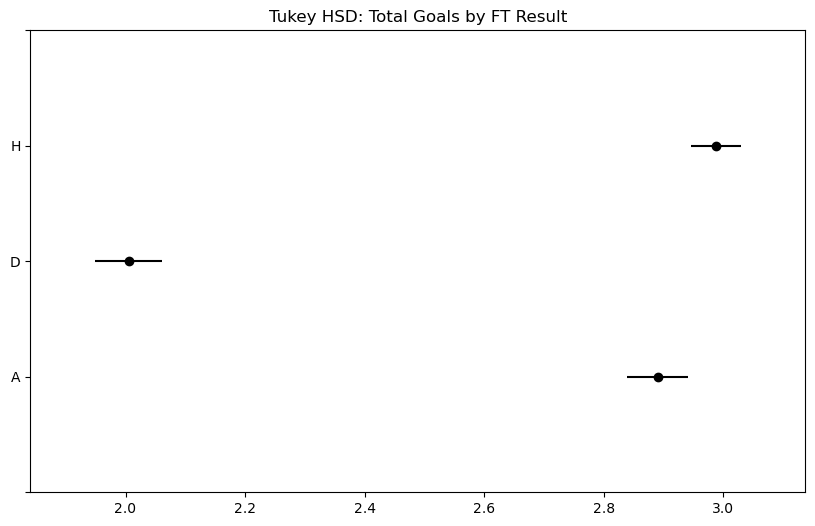

In [372]:
tukey.plot_simultaneous()
plt.title("Tukey HSD: Total Goals by FT Result")
plt.show()

visualizing the mean differences with one confidence interval per group (match result)

### Is there an association between half-time and full-time results?

using the chi-square test of independence test to determine whether half-time and full-time results are likely to be related or not.

- H0: Half-time result and full-time result are independent
- H1: There is an association between half-time and full-time results

In [373]:
contingency_table = pd.crosstab(data['HT Result'], data['FT_Result'])
print("Contingency table (Half-time result vs Full-time result):")
print(contingency_table)

Contingency table (Half-time result vs Full-time result):
FT_Result     A     D     H
HT Result                  
A          1565   443   235
D           994  1405  1419
H           179   465  2624


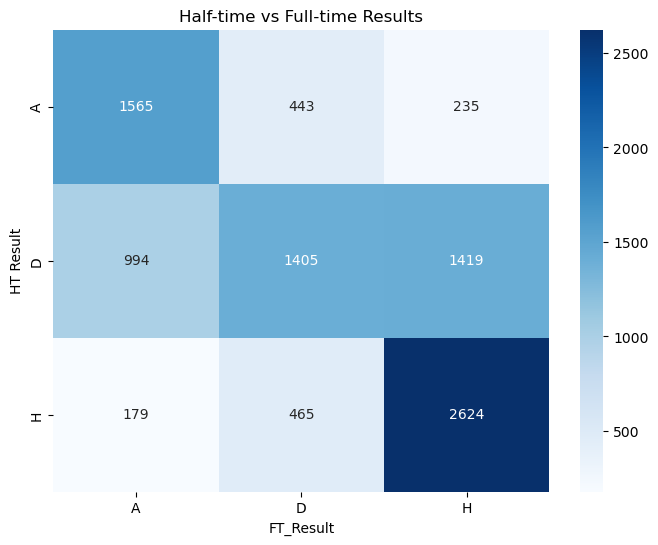

In [374]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title("Half-time vs Full-time Results")
plt.show()

In [375]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

if p_value < alpha:
    print(f"The p-value is less than {alpha}, so we reject the null hypothesis.")
    print("There is evidence of an association between half-time and full-time results.")
else:
    print(f"The p-value is greater than {alpha}, so we fail to reject the null hypothesis.")
    print("There is insufficient evidence of an association between half-time and full-time results.")

Chi-square test results:
Chi-square statistic: 3810.0007
p-value: 0.0000
Degrees of freedom: 4
The p-value is less than 0.05, so we reject the null hypothesis.
There is evidence of an association between half-time and full-time results.


In [376]:
cramers_v = stats.contingency.association(contingency_table, method="cramer")
print(f"Cramer's V: {cramers_v}")

Cramer's V: 0.45188713987790774


In [377]:
print("Expected frequencies if H0 were true:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

Expected frequencies if H0 were true:
FT_Result            A           D            H
HT Result                                      
A           658.305713  556.121664  1028.572623
D          1120.557830  946.621717  1750.820452
H           959.136456  810.256619  1498.606925


### Score Prediction Modeling

In [391]:
features = ['H Shots', 'A Shots', 'H SOT', 'A SOT', 'H Corners', 'A Corners']
X = data[features]
y_home = data['FTH Goals']
y_away = data['FTA Goals']

In [392]:
X_train, X_test, y_home_train, y_home_test, y_away_train, y_away_test = train_test_split(X, y_home, y_away, test_size=0.2, random_state=42)

In [393]:
home_model = LinearRegression()
home_model.fit(X_train, y_home_train)

away_model = LinearRegression()
away_model.fit(X_train, y_away_train)

LinearRegression()

In [394]:
y_home_pred = home_model.predict(X_test)
y_away_pred = away_model.predict(X_test)
home_rmse = root_mean_squared_error(y_home_test, y_home_pred)
away_rmse = root_mean_squared_error(y_away_test, y_away_pred)
home_r2 = r2_score(y_home_test, y_home_pred)
away_r2 = r2_score(y_away_test, y_away_pred)

print(f"Home goals prediction RMSE: {home_rmse:.4f}")
print(f"Away goals prediction RMSE: {away_rmse:.4f}")
print(f"Home goals prediction R-squared: {home_r2:.4f}")
print(f"Away goals prediction R-squared: {away_r2:.4f}")

Home goals prediction RMSE: 1.1454
Away goals prediction RMSE: 1.0014
Home goals prediction R-squared: 0.2134
Away goals prediction R-squared: 0.2298


In [397]:
cv_scores_lr_h = cross_val_score(home_model, X, y_home, cv=10, scoring='neg_root_mean_squared_error')
print(f'Home Linear Regression Cross-Validation RMSE: {-cv_scores_lr_h.mean()}')

cv_scores_lr_a = cross_val_score(away_model, X, y_away, cv=10, scoring='neg_root_mean_squared_error')
print(f'Away Linear Regression Cross-Validation RMSE: {-cv_scores_lr_a.mean()}')

Home Linear Regression Cross-Validation RMSE: 1.1584477503301591
Away Linear Regression Cross-Validation RMSE: 1.012876875096938


Text(0, 0.5, 'Predicted FTA Goals')

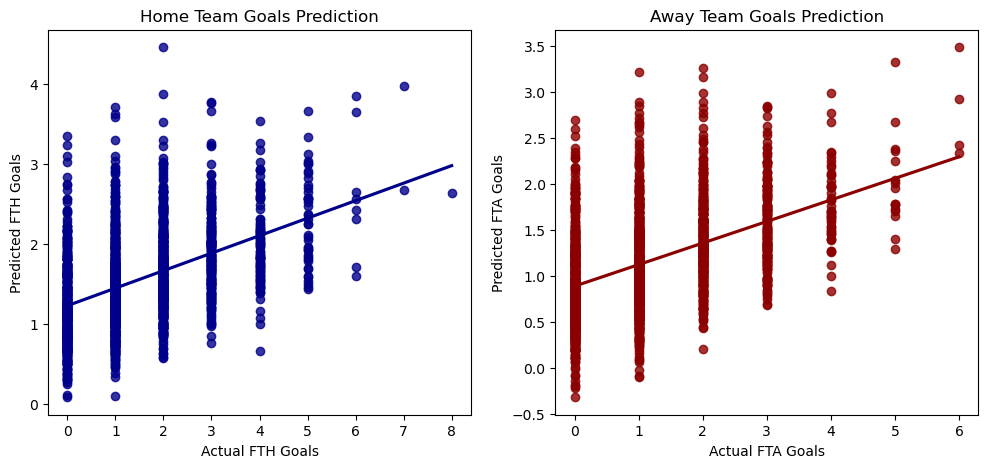

In [398]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# home regplot
sns.regplot(x = y_home_test, y=y_home_pred, ci = None, color = 'darkblue', marker='o', ax = axs[0])
axs[0].set_title('Home Team Goals Prediction')
axs[0].set_xlabel('Actual FTH Goals')
axs[0].set_ylabel('Predicted FTH Goals')

# away regplot
sns.regplot(x = y_away_test, y = y_away_pred, ci = None, color = 'darkred', marker='o', ax = axs[1])
axs[1].set_title('Away Team Goals Prediction')
axs[1].set_xlabel('Actual FTA Goals')
axs[1].set_ylabel('Predicted FTA Goals')

In [399]:
# feature importance
home_coef = pd.Series(home_model.coef_, index=features).sort_values(ascending=False)
away_coef = pd.Series(away_model.coef_, index=features).sort_values(ascending=False)

print("Feature importance for home goals prediction:")
print(home_coef)

print("Feature importance for away goals prediction:")
print(away_coef)

Feature importance for home goals prediction:
H SOT        0.191460
A Shots      0.009884
H Shots      0.005547
A Corners   -0.001004
H Corners   -0.061274
A SOT       -0.062215
dtype: float64
Feature importance for away goals prediction:
A SOT        0.207330
H Shots      0.016245
A Shots      0.010446
H Corners    0.005247
H SOT       -0.060145
A Corners   -0.063549
dtype: float64


### Match Result Prediction

In [400]:
data['Result'] = data['FT_Result'].map({'H': 1, 'D': 0, 'A': -1})
y_result = data['Result']

In [401]:
X_train, X_test, y_result_train, y_result_test = train_test_split(X, y_result, test_size=0.2, random_state=42)

In [402]:
result_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
result_model.fit(X_train, y_result_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [403]:
y_result_pred = result_model.predict(X_test)
result_accuracy = accuracy_score(y_result_test, y_result_pred)

print(f"Match result prediction accuracy: {result_accuracy:.4f}")
print(classification_report(y_result_test, y_result_pred, target_names=['Away Win', 'Draw', 'Home Win']))

Match result prediction accuracy: 0.5659
              precision    recall  f1-score   support

    Away Win       0.55      0.57      0.56       571
        Draw       0.47      0.02      0.04       455
    Home Win       0.57      0.86      0.69       840

    accuracy                           0.57      1866
   macro avg       0.53      0.48      0.43      1866
weighted avg       0.54      0.57      0.49      1866



In [404]:
y_result_pred_prob = result_model.predict_proba(X_test)

In [405]:
roc_auc_score(y_result_test, y_result_pred_prob, average='macro', multi_class='ovo')

0.6903552992888745